In [1]:
import numpy as np
import pandas as pd
import os
import random

In [2]:
DATA_IN_PATH = './quora/'
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
print(train_data.head(2))
train_data.info()
print("파일 크기:")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file)/1000000, 2)) + 'MB')

print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

   id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB
파일 크기:
sample_submission.csv         22.35MB
test.csv                  

In [3]:
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head()
print(train_set.head())
print('train data의 총 질문 수: {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문 수: {}'.format(np.sum(train_set.value_counts() > 1)))
print(train_set.sample(10, random_state =42))

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object
train data의 총 질문 수: 537361
반복해서 나타나는 질문 수: 111873
47617     What is truly the minimum for a minimum viable...
180001                       What are the Best B2B website?
286004    Would there be a World War 3, if South China S...
495904            Will WBJEE be cancelled due to NEET 2016?
647885                Why can't I stop crying when I'm mad?
584969         Which is the best laptop under 60k in india?
337773               What would your superpower be and why?
713627               How can I stop the urge to masturbate?
153750           Which is the best place to visit in India?
757778    Why is valet called valet? How did valet origi...
dtype: object


In [4]:
data = pd.read_csv('./quora/train.csv',index_col='id')
data.shape

(404290, 5)

In [5]:
import re
import nltk
from nltk.tokenize import TreebankWordTokenizer 
from nltk.tokenize.casual import casual_tokenize

In [6]:
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.lower()
    tokens = tokens.split()
    return tokens
def preprocess2(text):
    tokenizer = TreebankWordTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens
def preprocess3(text):
    tokens = casual_tokenize(text)
    return tokens

In [7]:
def preprocess4(text):
    ''' text를 list로 전처리하는 과정 '''
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = text.lower()
    text = text.split()

    return text

In [8]:
is_duplicate_pairs = train_data['is_duplicate']== 1
new_train_data01 = train_data[is_duplicate_pairs]
new_train_data01.head()

,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1


In [9]:
new_train_data01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149263 entries, 5 to 404286
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            149263 non-null  int64 
 1   qid1          149263 non-null  int64 
 2   qid2          149263 non-null  int64 
 3   question1     149263 non-null  object
 4   question2     149263 non-null  object
 5   is_duplicate  149263 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 8.0+ MB


In [10]:
x1 = new_train_data01['question1'].tolist()
x2 = new_train_data01['question2'].tolist()

In [11]:
new_duplicate_pairs = new_train_data01.sample(n=100)
new_duplicate_pairs.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
148049,148049,233523,233524,What's your story?,What's your story of life?,1
340994,340994,319499,245362,What's the difference between cd and DVD?,What is the major difference between a CD and ...,1
192479,192479,292123,292124,Why do HongKongers seem more superior than mai...,Why do people from Hong Kong feel superior tha...,1
159671,159671,249217,249218,What is it with gold digger?,What is gold digger?,1
203738,203738,306433,306434,What are all the greatest innovation in 2016?,What are the greatest innovations of 2016?,1
155423,155423,50365,243482,Who are your best friends?,Who are your best friends and why?,1
270903,270903,388864,388865,What are some good Japanese films?,What are the best Japanese movies?,1
213191,213191,228339,165532,Why is the right side of the chest is paining?,Why do l feel pain in the right side of the ch...,1
33011,33011,60708,60709,What is the difference between Russia and Ukra...,Which are the cultural differences between Rus...,1
161297,161297,251383,241546,Why do North Indians mispronounce so many Engl...,What makes North Indians hate English?,1


In [12]:
x1 = new_duplicate_pairs['question1'].tolist()
x2 = new_duplicate_pairs['question2'].tolist()
print(x1, x2)

["What's your story?", "What's the difference between cd and DVD?", 'Why do HongKongers seem more superior than mainlanders?', 'What is it with gold digger?', 'What are all the greatest innovation in 2016?', 'Who are your best friends?', 'What are some good Japanese films?', 'Why is the right side of the chest is paining?', 'What is the difference between Russia and Ukraine?', 'Why do North Indians mispronounce so many English words?', "Why won't my Epson printer print?", 'Why do some people think they are better than everyone else?', 'How do I become a boring person?', 'How do I improve my overall native English language?', 'What will be the features in Samsung Galaxy Note 7?', 'Is there any method to unlock icloud id lock by anything?', 'Do believers curse god?', 'What does Turkish sound like to you?', 'What are the secrets of life?', 'Where can I find cheapest gaming laptops?', 'What is the demand curves? What causes shifts in this?', 'What are the best Hollywood movies to watch in 

In [13]:
l1 = []
for i in x1:
    x11 = preprocess4(i)
    l1.append(x11)
l2 = []
for i in x2:
    x22 = preprocess4(i)
    l2.append(x22)
print(l1)
print('################1-shingles, one-gram으로 추출했을 경우########################')
print(l2)

[['what', 'your', 'story'], ['what', 'the', 'difference', 'between', 'cd', 'and', 'dvd'], ['why', 'do', 'hongkongers', 'seem', 'more', 'superior', 'than', 'mainlanders'], ['what', 'is', 'it', 'with', 'gold', 'digger'], ['what', 'are', 'all', 'the', 'greatest', 'innovation', 'in', '2016'], ['who', 'are', 'your', 'best', 'friends'], ['what', 'are', 'some', 'good', 'japanese', 'films'], ['why', 'is', 'the', 'right', 'side', 'of', 'the', 'chest', 'is', 'paining'], ['what', 'is', 'the', 'difference', 'between', 'russia', 'and', 'ukraine'], ['why', 'do', 'north', 'indians', 'mispronounce', 'so', 'many', 'english', 'words'], ['why', 'wo', 'not', 'my', 'epson', 'printer', 'print'], ['why', 'do', 'some', 'people', 'think', 'they', 'are', 'better', 'than', 'everyone', 'else'], ['how', 'do', 'i', 'become', 'a', 'boring', 'person'], ['how', 'do', 'i', 'improve', 'my', 'overall', 'native', 'english', 'language'], ['what', 'will', 'be', 'the', 'features', 'in', 'samsung', 'galaxy', 'note', '7'], ['i

In [14]:
#shingle을 한 문장으로 추출 후 다시 vector로 표현
def shingles_to_one_list(long):
    short = ''
    for k in long:
        if long.index(k) == len(long) - 1:
            short = short + k
        else:
            short = short + k + ' '
    return short

In [15]:
corpus_l1 = []
corpus_l2 = []
for i in range(10):
    aa = shingles_to_one_list(l1[i])
    bb = shingles_to_one_list(l2[i])
    corpus_l1.append(str(aa))
    corpus_l2.append(str(bb))
print(corpus_l1)
print(corpus_l2)


['what your story', 'what the difference between cd and dvd', 'why do hongkongers seem more superior than mainlanders', 'what is it with gold digger', 'what are all the greatest innovation in 2016', 'who are your best friends', 'what are some good japanese films', 'why is the right side of the chest is paining', 'what is the difference between russia and ukraine', 'why do north indians mispronounce so many english words']
['what your story of life', 'what is the major difference between a cd and a dvd', 'why do people from hong kong feel superior than mainlanders', 'what is gold digger', 'what are the greatest innovations of 2016', 'who are your best friends and why', 'what are the best japanese movies', 'why do l feel pain in the right side of the chest', 'which are the cultural differences between russia and ukraine', 'what makes north indians hate english']


In [16]:
def get_document_vector(d1, d2):
    """
    z = set()
    for i in d1:
        z.add(i)
    for j in d2:
        z.add(i)
    """
    corpus = {}
    sentences = d1 + '\n'
    sentences += d2
    for i, document in enumerate(sentences.split('\n')):
        corpus['document{}'.format(i)] = dict((tok, 1) for tok in document.split(' '))
    df = pd.DataFrame.from_records(corpus).fillna(0).astype(int)
    return df

In [17]:
for i in range(10):
    document_vector = get_document_vector(corpus_l1[i], corpus_l2[i])
    print(document_vector)

       document0  document1
what           1          1
your           1          1
story          1          1
of             0          1
life           0          1
            document0  document1
what                1          1
the                 1          1
difference          1          1
between             1          1
cd                  1          1
and                 1          1
dvd                 1          1
is                  0          1
major               0          1
a                   0          1
             document0  document1
why                  1          1
do                   1          1
hongkongers          1          0
seem                 1          0
more                 1          0
superior             1          1
than                 1          1
mainlanders          1          1
people               0          1
from                 0          1
hong                 0          1
kong                 0          1
feel                 0     

In [18]:
# k = 5로 잡았을 때
def get_shingles(size, f):
    for i in range(0, len(f)-5+1):
        yield tuple(f[i:i+5])
shingles01 = { i for i in get_shingles(5, l1[0])}
print(shingles01)

set()


In [19]:
shingles02 = { i for i in get_shingles(5, l2[0])}
print(shingles02)
    

{('what', 'your', 'story', 'of', 'life')}


In [20]:
def jaccard_similarity(a, b):
    c = a.intersection(b)
    d = float((len(a) + len(b))) - len(c)
    return float(len(c)) / d

In [21]:
jaccard_similarity(shingles01, shingles02)

0.0

In [22]:
print(len(l1), len(l2))

100 100


In [23]:
def set_to_list(xx):
    l = list(xx)
    return l     

In [24]:
x234 = []
for i in l1:
    shingles = { i for i in get_shingles(5, i)}
    set_to_list(shingles)
    x234.append(list(shingles))
print(x234)

[[], [('the', 'difference', 'between', 'cd', 'and'), ('what', 'the', 'difference', 'between', 'cd'), ('difference', 'between', 'cd', 'and', 'dvd')], [('hongkongers', 'seem', 'more', 'superior', 'than'), ('seem', 'more', 'superior', 'than', 'mainlanders'), ('do', 'hongkongers', 'seem', 'more', 'superior'), ('why', 'do', 'hongkongers', 'seem', 'more')], [('what', 'is', 'it', 'with', 'gold'), ('is', 'it', 'with', 'gold', 'digger')], [('what', 'are', 'all', 'the', 'greatest'), ('are', 'all', 'the', 'greatest', 'innovation'), ('all', 'the', 'greatest', 'innovation', 'in'), ('the', 'greatest', 'innovation', 'in', '2016')], [('who', 'are', 'your', 'best', 'friends')], [('what', 'are', 'some', 'good', 'japanese'), ('are', 'some', 'good', 'japanese', 'films')], [('side', 'of', 'the', 'chest', 'is'), ('right', 'side', 'of', 'the', 'chest'), ('the', 'right', 'side', 'of', 'the'), ('is', 'the', 'right', 'side', 'of'), ('why', 'is', 'the', 'right', 'side'), ('of', 'the', 'chest', 'is', 'paining')],

In [25]:
x235 = []
for i in l2:
    shingles = { i for i in get_shingles(5, i)}
    set_to_list(shingles)
    x235.append(list(shingles))
print(x235)

[[('what', 'your', 'story', 'of', 'life')], [('is', 'the', 'major', 'difference', 'between'), ('difference', 'between', 'a', 'cd', 'and'), ('between', 'a', 'cd', 'and', 'a'), ('a', 'cd', 'and', 'a', 'dvd'), ('the', 'major', 'difference', 'between', 'a'), ('what', 'is', 'the', 'major', 'difference'), ('major', 'difference', 'between', 'a', 'cd')], [('hong', 'kong', 'feel', 'superior', 'than'), ('do', 'people', 'from', 'hong', 'kong'), ('kong', 'feel', 'superior', 'than', 'mainlanders'), ('people', 'from', 'hong', 'kong', 'feel'), ('from', 'hong', 'kong', 'feel', 'superior'), ('why', 'do', 'people', 'from', 'hong')], [], [('are', 'the', 'greatest', 'innovations', 'of'), ('the', 'greatest', 'innovations', 'of', '2016'), ('what', 'are', 'the', 'greatest', 'innovations')], [('your', 'best', 'friends', 'and', 'why'), ('are', 'your', 'best', 'friends', 'and'), ('who', 'are', 'your', 'best', 'friends')], [('what', 'are', 'the', 'best', 'japanese'), ('are', 'the', 'best', 'japanese', 'movies')]

In [26]:
i = 0
d = {}
for value in x1:
    d[i] = value
    d[i] = re.sub("[^\w]", " ", d[i]).split()
    if d[i]:
        i = i + 1
    else:
        del d[i]
print(d)

{0: ['What', 's', 'your', 'story'], 1: ['What', 's', 'the', 'difference', 'between', 'cd', 'and', 'DVD'], 2: ['Why', 'do', 'HongKongers', 'seem', 'more', 'superior', 'than', 'mainlanders'], 3: ['What', 'is', 'it', 'with', 'gold', 'digger'], 4: ['What', 'are', 'all', 'the', 'greatest', 'innovation', 'in', '2016'], 5: ['Who', 'are', 'your', 'best', 'friends'], 6: ['What', 'are', 'some', 'good', 'Japanese', 'films'], 7: ['Why', 'is', 'the', 'right', 'side', 'of', 'the', 'chest', 'is', 'paining'], 8: ['What', 'is', 'the', 'difference', 'between', 'Russia', 'and', 'Ukraine'], 9: ['Why', 'do', 'North', 'Indians', 'mispronounce', 'so', 'many', 'English', 'words'], 10: ['Why', 'won', 't', 'my', 'Epson', 'printer', 'print'], 11: ['Why', 'do', 'some', 'people', 'think', 'they', 'are', 'better', 'than', 'everyone', 'else'], 12: ['How', 'do', 'I', 'become', 'a', 'boring', 'person'], 13: ['How', 'do', 'I', 'improve', 'my', 'overall', 'native', 'English', 'language'], 14: ['What', 'will', 'be', 'the

In [27]:
from datasketch import MinHash

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

0 0 0.0
1 1 0.0
2 2 0.0
3 3 0.0
4 4 1.0
5 5 0.0
6 6 0.0
7 7 0.0
8 8 1.0
9 9 1.0
10 10 1.0
11 11 1.0
12 12 0.0
13 13 0.0
14 14 1.0
15 15 0.0
16 16 0.0
17 17 1.0
18 18 0.0
19 19 1.0
20 20 1.0
21 21 0.0
22 22 1.0
23 23 1.0
24 24 0.0
25 25 1.0
26 26 1.0
27 27 0.0
28 28 1.0
29 29 0.0
30 30 1.0
31 31 0.0
32 32 0.0
33 33 1.0
34 34 0.0
35 35 0.0
36 36 1.0
37 37 0.0
38 38 1.0
39 39 0.0
40 40 0.0
41 41 0.0
42 42 0.0
43 43 0.0
44 44 0.0
45 45 1.0
46 46 1.0
47 47 1.0
48 48 0.0
49 49 0.0
50 50 1.0
51 51 0.0
52 52 0.0
53 53 0.0
54 54 1.0
55 55 1.0
56 56 1.0
57 57 0.0
58 58 1.0
59 59 0.0
60 60 1.0
61 61 0.0
62 62 0.0
63 63 0.0
64 64 1.0
65 65 1.0
66 66 1.0
67 67 0.0
68 68 1.0
69 69 0.0
70 70 0.0
71 71 1.0
72 72 0.0
73 73 1.0
74 74 0.0
75 75 1.0
76 76 1.0
77 77 0.0
78 78 0.0
79 79 0.0
80 80 0.0
81 81 0.0
82 82 0.0
83 83 1.0
84 84 0.0
85 85 1.0
86 86 0.0
87 87 0.0
88 88 1.0
89 89 1.0
90 90 0.0
91 91 0.0
92 92 0.0
93 93 1.0
94 94 0.0
95 95 0.0
96 96 0.0
97 97 0.0
98 98 0.0
99 99 1.0
[[0. 0. 0. ... 0. 0.

11 11 0.5
12 12 0.25
13 13 0.0
14 14 0.75
15 15 0.0
16 16 0.0
17 17 0.5
18 18 0.0
19 19 1.0
20 20 0.5
21 21 0.0
22 22 0.75
23 23 0.75
24 24 0.5
25 25 0.25
26 26 0.75
27 27 0.75
28 28 0.75
29 29 0.5
30 30 0.5
31 31 0.5
32 32 0.5
33 33 0.25
34 34 0.25
35 35 0.25
36 36 0.75
37 37 0.5
38 38 0.75
39 39 0.25
40 40 0.0
41 41 0.75
42 42 0.5
43 43 0.0
44 44 0.25
45 45 0.75
46 46 0.5
47 47 0.25
48 48 0.0
49 49 0.75
50 50 0.5
51 51 0.75
52 52 0.75
53 53 0.0
54 54 0.5
55 55 1.0
56 56 0.5
57 57 0.25
58 58 1.0
59 59 0.5
60 60 0.75
61 61 0.0
62 62 0.25
63 63 0.0
64 64 0.75
65 65 0.75
66 66 0.75
67 67 0.0
68 68 1.0
69 69 0.25
70 70 0.0
71 71 0.25
72 72 0.25
73 73 0.75
74 74 0.25
75 75 0.25
76 76 0.75
77 77 0.25
78 78 0.25
79 79 0.25
80 80 0.5
81 81 0.0
82 82 0.5
83 83 1.0
84 84 0.0
85 85 0.5
86 86 0.0
87 87 0.25
88 88 0.5
89 89 0.5
90 90 0.5
91 91 0.0
92 92 0.25
93 93 0.5
94 94 0.5
95 95 0.25
96 96 0.25
97 97 0.75
98 98 0.5
99 99 0.25
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.5  0.   ... 0.   0.  

18 18 0.0
19 19 0.8571428571428571
20 20 0.5714285714285714
21 21 0.2857142857142857
22 22 0.5714285714285714
23 23 0.8571428571428571
24 24 0.5714285714285714
25 25 0.42857142857142855
26 26 0.7142857142857143
27 27 0.5714285714285714
28 28 0.5714285714285714
29 29 0.42857142857142855
30 30 0.5714285714285714
31 31 0.42857142857142855
32 32 0.5714285714285714
33 33 0.2857142857142857
34 34 0.2857142857142857
35 35 0.2857142857142857
36 36 0.5714285714285714
37 37 0.2857142857142857
38 38 0.7142857142857143
39 39 0.42857142857142855
40 40 0.0
41 41 0.5714285714285714
42 42 0.42857142857142855
43 43 0.14285714285714285
44 44 0.2857142857142857
45 45 0.5714285714285714
46 46 0.42857142857142855
47 47 0.2857142857142857
48 48 0.14285714285714285
49 49 0.7142857142857143
50 50 0.2857142857142857
51 51 0.7142857142857143
52 52 0.7142857142857143
53 53 0.0
54 54 0.42857142857142855
55 55 1.0
56 56 0.42857142857142855
57 57 0.2857142857142857
58 58 0.7142857142857143
59 59 0.5714285714285714


10 10 0.7
11 11 0.3
12 12 0.4
13 13 0.1
14 14 0.9
15 15 0.0
16 16 0.0
17 17 0.2
18 18 0.0
19 19 0.9
20 20 0.5
21 21 0.3
22 22 0.5
23 23 0.8
24 24 0.5
25 25 0.4
26 26 0.6
27 27 0.6
28 28 0.6
29 29 0.5
30 30 0.6
31 31 0.5
32 32 0.7
33 33 0.5
34 34 0.2
35 35 0.4
36 36 0.5
37 37 0.2
38 38 0.8
39 39 0.3
40 40 0.1
41 41 0.6
42 42 0.4
43 43 0.3
44 44 0.4
45 45 0.7
46 46 0.3
47 47 0.2
48 48 0.3
49 49 0.6
50 50 0.4
51 51 0.6
52 52 0.6
53 53 0.2
54 54 0.4
55 55 0.8
56 56 0.5
57 57 0.3
58 58 0.7
59 59 0.5
60 60 0.9
61 61 0.5
62 62 0.3
63 63 0.2
64 64 0.9
65 65 0.7
66 66 0.5
67 67 0.1
68 68 0.8
69 69 0.2
70 70 0.2
71 71 0.3
72 72 0.1
73 73 0.8
74 74 0.4
75 75 0.3
76 76 0.8
77 77 0.3
78 78 0.4
79 79 0.5
80 80 0.4
81 81 0.3
82 82 0.4
83 83 1.0
84 84 0.3
85 85 0.7
86 86 0.2
87 87 0.5
88 88 0.6
89 89 0.5
90 90 0.4
91 91 0.1
92 92 0.5
93 93 0.3
94 94 0.5
95 95 0.2
96 96 0.2
97 97 0.8
98 98 0.6
99 99 0.6
[[0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.7 0.  ... 0.  0.  0. ]
 [0.  0.  0.1 ... 0.  0.  0. ]
 ...
 [

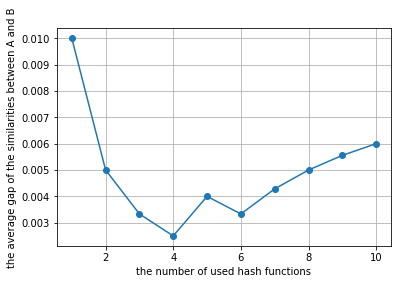

In [29]:
xxx = [w for w in range(1, 11)]
yyy = []
for s in range(1, 11):
    matrix_estimated_jaccard = np.zeros((len(l1), len(l2)))
    for i in range(len(l1)):
        for j in range(len(l2)):
                if i == j:     
                    m1, m2 = MinHash(num_perm = s), MinHash(num_perm = s)
                    for k in x234[i]:
                        for d in k:
                            m1.update(d.encode('utf8'))
                    for k in x235[j]:
                        for d in k:
                            m2.update(d.encode('utf8'))
                    matrix_estimated_jaccard[i, j] = m1.jaccard(m2)
                    print(i, j, m1.jaccard(m2))
                else: 
                    pass
    print(matrix_estimated_jaccard)
    matrix_true_jaccard = np.zeros((len(l1), len(l2)))
    for i in range(len(l1)):
        for j in range(len(l2)):
            if i == j:
                s1 = set()
                s2 = set()
                for k in x234[i]:
                    s1.add(k)
                for m in x235[j]:
                    s2.add(m)    
                if float(len(s1.union(s2))) == 0:
                    matrix_true_jaccard[i, j] = 0
                    actual_jaccard = 0
                else:
                    actual_jaccard = float(len(s1.intersection(s2)))/float(len(s1.union(s2)))
                    matrix_true_jaccard[i, j] = actual_jaccard
                print(i, j, actual_jaccard)
            else: 
                pass
    print(matrix_true_jaccard)
    for i in range(len(l1)):
        for j in range(len(l2)):
            total_p = 0
            if i == j:
                total_p += abs(matrix_estimated_jaccard[i, j] - matrix_true_jaccard[i, j])
            else:
                pass
    average_gap_k_5 = total_p/len(l1)
    yyy.append(average_gap_k_5)
plt.figure()
plt.xlabel('')
plt.plot(xxx, yyy, marker = 'o')
plt.grid(True)
plt.xlabel('the number of used hash functions')
plt.ylabel('the average gap of the similarities between A and B')
plt.show()

0 0 1.0
1 1 0.0
2 2 0.0
3 3 1.0
4 4 1.0
5 5 0.0
6 6 0.0
7 7 0.0
8 8 1.0
9 9 1.0
10 10 1.0
11 11 1.0
12 12 0.0
13 13 0.0
14 14 1.0
15 15 0.0
16 16 1.0
17 17 1.0
18 18 0.0
19 19 1.0
20 20 1.0
21 21 0.0
22 22 1.0
23 23 1.0
24 24 0.0
25 25 1.0
26 26 1.0
27 27 0.0
28 28 1.0
29 29 0.0
30 30 1.0
31 31 0.0
32 32 0.0
33 33 1.0
34 34 0.0
35 35 0.0
36 36 1.0
37 37 0.0
38 38 1.0
39 39 0.0
40 40 0.0
41 41 0.0
42 42 0.0
43 43 0.0
44 44 0.0
45 45 1.0
46 46 1.0
47 47 1.0
48 48 0.0
49 49 0.0
50 50 1.0
51 51 0.0
52 52 0.0
53 53 0.0
54 54 1.0
55 55 1.0
56 56 1.0
57 57 0.0
58 58 1.0
59 59 0.0
60 60 1.0
61 61 0.0
62 62 0.0
63 63 0.0
64 64 1.0
65 65 1.0
66 66 1.0
67 67 0.0
68 68 1.0
69 69 0.0
70 70 0.0
71 71 1.0
72 72 0.0
73 73 1.0
74 74 0.0
75 75 1.0
76 76 1.0
77 77 0.0
78 78 0.0
79 79 0.0
80 80 0.0
81 81 0.0
82 82 0.0
83 83 1.0
84 84 0.0
85 85 1.0
86 86 0.0
87 87 0.0
88 88 1.0
89 89 1.0
90 90 0.0
91 91 0.0
92 92 0.0
93 93 1.0
94 94 0.0
95 95 0.0
96 96 0.0
97 97 0.0
98 98 0.0
99 99 1.0
[[1. 0. 0. ... 0. 0.

9 9 0.6
10 10 0.6
11 11 0.4
12 12 0.4
13 13 0.0
14 14 0.8
15 15 0.0
16 16 0.8
17 17 0.4
18 18 0.4
19 19 0.8
20 20 0.6
21 21 0.2
22 22 0.6
23 23 0.8
24 24 0.4
25 25 0.4
26 26 0.6
27 27 0.6
28 28 0.6
29 29 0.6
30 30 0.6
31 31 0.4
32 32 0.6
33 33 0.2
34 34 0.4
35 35 0.4
36 36 0.8
37 37 0.4
38 38 0.8
39 39 0.2
40 40 0.0
41 41 0.6
42 42 0.6
43 43 0.0
44 44 0.4
45 45 0.6
46 46 0.6
47 47 0.4
48 48 0.0
49 49 0.6
50 50 0.4
51 51 0.6
52 52 0.8
53 53 0.0
54 54 0.4
55 55 1.0
56 56 0.4
57 57 0.4
58 58 0.8
59 59 0.6
60 60 0.8
61 61 0.2
62 62 0.2
63 63 0.0
64 64 0.8
65 65 0.6
66 66 0.8
67 67 0.0
68 68 1.0
69 69 0.2
70 70 0.0
71 71 0.2
72 72 0.2
73 73 0.8
74 74 0.4
75 75 0.4
76 76 0.8
77 77 0.2
78 78 0.4
79 79 0.4
80 80 0.6
81 81 0.0
82 82 0.6
83 83 1.0
84 84 0.2
85 85 0.4
86 86 0.2
87 87 0.2
88 88 0.6
89 89 0.4
90 90 0.4
91 91 0.0
92 92 0.4
93 93 0.4
94 94 0.4
95 95 0.4
96 96 0.2
97 97 0.8
98 98 0.6
99 99 0.4
[[0.6 0.  0.  ... 0.  0.  0. ]
 [0.  0.6 0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]

97 97 0.875
98 98 0.625
99 99 0.5
[[0.5   0.    0.    ... 0.    0.    0.   ]
 [0.    0.625 0.    ... 0.    0.    0.   ]
 [0.    0.    0.125 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.875 0.    0.   ]
 [0.    0.    0.    ... 0.    0.625 0.   ]
 [0.    0.    0.    ... 0.    0.    0.5  ]]
0 0 0.6
1 1 0.7
2 2 0.38461538461538464
3 3 0.6666666666666666
4 4 0.5
5 5 0.7142857142857143
6 6 0.3333333333333333
7 7 0.46153846153846156
8 8 0.4166666666666667
9 9 0.25
10 10 0.5384615384615384
11 11 0.6428571428571429
12 12 0.5555555555555556
13 13 0.17647058823529413
14 14 0.6666666666666666
15 15 0.1875
16 16 0.8
17 17 0.3333333333333333
18 18 0.5
19 19 0.75
20 20 0.2857142857142857
21 21 0.42857142857142855
22 22 0.4117647058823529
23 23 0.7142857142857143
24 24 0.2857142857142857
25 25 0.4666666666666667
26 26 0.4
27 27 0.75
28 28 0.8571428571428571
29 29 0.5
30 30 0.5
31 31 0.4583333333333333
32 32 0.6363636363636364
33 33 0.36363636363636365
34 34 0.3
35 35 0.5555555555555556
36 36 

68 68 0.8
69 69 0.2
70 70 0.2
71 71 0.3
72 72 0.1
73 73 0.8
74 74 0.4
75 75 0.3
76 76 0.8
77 77 0.3
78 78 0.4
79 79 0.5
80 80 0.4
81 81 0.3
82 82 0.4
83 83 1.0
84 84 0.3
85 85 0.7
86 86 0.2
87 87 0.5
88 88 0.6
89 89 0.5
90 90 0.4
91 91 0.1
92 92 0.5
93 93 0.3
94 94 0.5
95 95 0.2
96 96 0.2
97 97 0.8
98 98 0.6
99 99 0.6
[[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.7 0.  ... 0.  0.  0. ]
 [0.  0.  0.1 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.8 0.  0. ]
 [0.  0.  0.  ... 0.  0.6 0. ]
 [0.  0.  0.  ... 0.  0.  0.6]]
0 0 0.6
1 1 0.7
2 2 0.38461538461538464
3 3 0.6666666666666666
4 4 0.5
5 5 0.7142857142857143
6 6 0.3333333333333333
7 7 0.46153846153846156
8 8 0.4166666666666667
9 9 0.25
10 10 0.5384615384615384
11 11 0.6428571428571429
12 12 0.5555555555555556
13 13 0.17647058823529413
14 14 0.6666666666666666
15 15 0.1875
16 16 0.8
17 17 0.3333333333333333
18 18 0.5
19 19 0.75
20 20 0.2857142857142857
21 21 0.42857142857142855
22 22 0.4117647058823529
23 23 0.7142857142857143
24 24 0.28571428571

29 29 0.5
30 30 0.6666666666666666
31 31 0.5
32 32 0.5833333333333334
33 33 0.5
34 34 0.25
35 35 0.5
36 36 0.5833333333333334
37 37 0.3333333333333333
38 38 0.6666666666666666
39 39 0.3333333333333333
40 40 0.08333333333333333
41 41 0.6666666666666666
42 42 0.5
43 43 0.4166666666666667
44 44 0.5
45 45 0.6666666666666666
46 46 0.25
47 47 0.16666666666666666
48 48 0.25
49 49 0.5833333333333334
50 50 0.4166666666666667
51 51 0.6666666666666666
52 52 0.6666666666666666
53 53 0.16666666666666666
54 54 0.4166666666666667
55 55 0.75
56 56 0.5
57 57 0.25
58 58 0.6666666666666666
59 59 0.5
60 60 0.9166666666666666
61 61 0.5833333333333334
62 62 0.25
63 63 0.25
64 64 0.9166666666666666
65 65 0.5833333333333334
66 66 0.4166666666666667
67 67 0.08333333333333333
68 68 0.75
69 69 0.16666666666666666
70 70 0.16666666666666666
71 71 0.25
72 72 0.08333333333333333
73 73 0.8333333333333334
74 74 0.4166666666666667
75 75 0.25
76 76 0.75
77 77 0.25
78 78 0.4166666666666667
79 79 0.4166666666666667
80 80 

70 70 0.22580645161290322
71 71 0.3076923076923077
72 72 0.35294117647058826
73 73 0.7272727272727273
74 74 0.3888888888888889
75 75 0.35
76 76 0.6363636363636364
77 77 0.391304347826087
78 78 0.45454545454545453
79 79 0.2857142857142857
80 80 0.36363636363636365
81 81 0.46153846153846156
82 82 0.29411764705882354
83 83 0.9
84 84 0.2727272727272727
85 85 0.7272727272727273
86 86 0.3333333333333333
87 87 0.6
88 88 0.7142857142857143
89 89 0.7
90 90 0.3157894736842105
91 91 0.23333333333333334
92 92 0.5
93 93 0.23076923076923078
94 94 0.75
95 95 0.5384615384615384
96 96 0.3333333333333333
97 97 0.6666666666666666
98 98 0.6363636363636364
99 99 0.5
[[0.6        0.         0.         ... 0.         0.         0.        ]
 [0.         0.7        0.         ... 0.         0.         0.        ]
 [0.         0.         0.38461538 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.66666667 0.         0.        ]
 [0.         0.         0.         ... 0.        

28 28 0.6470588235294118
29 29 0.47058823529411764
30 30 0.5882352941176471
31 31 0.4117647058823529
32 32 0.5882352941176471
33 33 0.4117647058823529
34 34 0.23529411764705882
35 35 0.47058823529411764
36 36 0.5882352941176471
37 37 0.29411764705882354
38 38 0.7647058823529411
39 39 0.29411764705882354
40 40 0.058823529411764705
41 41 0.6470588235294118
42 42 0.4117647058823529
43 43 0.47058823529411764
44 44 0.4117647058823529
45 45 0.7058823529411765
46 46 0.17647058823529413
47 47 0.23529411764705882
48 48 0.23529411764705882
49 49 0.5294117647058824
50 50 0.4117647058823529
51 51 0.5882352941176471
52 52 0.7058823529411765
53 53 0.11764705882352941
54 54 0.35294117647058826
55 55 0.7647058823529411
56 56 0.5294117647058824
57 57 0.23529411764705882
58 58 0.7058823529411765
59 59 0.5294117647058824
60 60 0.8823529411764706
61 61 0.6470588235294118
62 62 0.4117647058823529
63 63 0.29411764705882354
64 64 0.9411764705882353
65 65 0.5882352941176471
66 66 0.35294117647058826
67 67 0.0

40 40 0.16666666666666666
41 41 0.6153846153846154
42 42 0.5454545454545454
43 43 0.46153846153846156
44 44 0.23076923076923078
45 45 0.5
46 46 0.25
47 47 0.29411764705882354
48 48 0.125
49 49 0.3333333333333333
50 50 0.4
51 51 0.4444444444444444
52 52 0.875
53 53 0.23529411764705882
54 54 0.2857142857142857
55 55 0.7777777777777778
56 56 0.5
57 57 0.4
58 58 0.6666666666666666
59 59 0.5
60 60 0.8823529411764706
61 61 0.6153846153846154
62 62 0.46153846153846156
63 63 0.26666666666666666
64 64 0.875
65 65 0.5
66 66 0.42857142857142855
67 67 0.14285714285714285
68 68 0.7777777777777778
69 69 0.5
70 70 0.22580645161290322
71 71 0.3076923076923077
72 72 0.35294117647058826
73 73 0.7272727272727273
74 74 0.3888888888888889
75 75 0.35
76 76 0.6363636363636364
77 77 0.391304347826087
78 78 0.45454545454545453
79 79 0.2857142857142857
80 80 0.36363636363636365
81 81 0.46153846153846156
82 82 0.29411764705882354
83 83 0.9
84 84 0.2727272727272727
85 85 0.7272727272727273
86 86 0.333333333333333

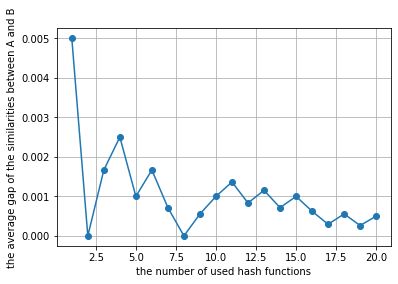

In [30]:
x_axis = [w for w in range(1, 21)]
y_axis = []
for s in range(1, 21):
    matrix_estimated_jaccard = np.zeros((len(l1), len(l2)))
    for i in range(len(l1)):
        for j in range(len(l2)):
                if i == j:     
                    m1, m2 = MinHash(num_perm = s), MinHash(num_perm = s)
                    for d in l1[i]:
                        m1.update(d.encode('utf8'))
                    for d in l2[j]:
                        m2.update(d.encode('utf8'))
                    matrix_estimated_jaccard[i, j] = m1.jaccard(m2)
                    print(i, j, m1.jaccard(m2))
                else: 
                    pass
    print(matrix_estimated_jaccard)
    matrix_true_jaccard = np.zeros((len(l1), len(l2)))
    for i in range(len(l1)):
        for j in range(len(l2)):
                s1 = set(l1[i])
                s2 = set(l2[j])
                if i == j:
                    actual_jaccard = float(len(s1.intersection(s2)))/float(len(s1.union(s2)))
                    matrix_true_jaccard[i, j] = actual_jaccard
                    print(i, j, actual_jaccard)
                else: 
                    pass
    print(matrix_true_jaccard)
    for i in range(len(l1)):
        for j in range(len(l2)):
            total_p = 0
            if i == j:
                total_p += abs(matrix_estimated_jaccard[i, j] - matrix_true_jaccard[i, j])
            else:
                pass
    average_gap = total_p/len(l1)
    y_axis.append(average_gap)
plt.figure()
plt.xlabel('')
plt.plot(x_axis, y_axis, marker = 'o')
plt.grid(True)
plt.xlabel('the number of used hash functions')
plt.ylabel('the average gap of the similarities between A and B')
plt.show()